In [3]:
library(ggplot2)
library(dplyr)

In [4]:
df <- read.csv('../ProjectData/2018_JP_VP_Level4.csv')

In [5]:
# see number of columns:
ncol(df)
nrow(df)

[1] 12

[1] 221764

In [6]:
# see number of NA values.
sum(is.na(df))

[1] 478242

In [7]:
df <- na.omit(df)

In [8]:
ncol(df)
nrow(df)

[1] 12

[1] 164646

In [9]:
# see number of NA values.
sum(is.na(df))

[1] 0

In [10]:
head(df)

,DateTime,Site_Name,Chla_Water_EXO,SensorDepth_Water_EXO,DO_Water_EXO,DO.Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,Turbidity_Water_EXO,pH_Water_EXO,PC_Water_EXO,fDOM_Water_EXO
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
675,2018-05-14 16:07:00,VP_AnthonysNose,0.198,0.99,12.53,108.84,138.63,9.12,0.51,7.630000,0.1514716,1.030458
676,2018-05-14 16:08:00,VP_AnthonysNose,0.099,1.80,12.53,108.75,138.62,9.12,0.49,7.629989,0.1514716,1.066934
677,2018-05-14 16:09:00,VP_AnthonysNose,0.072,3.04,12.54,108.85,138.54,9.12,0.53,7.629978,0.1714021,1.021339
678,2018-05-14 16:10:00,VP_AnthonysNose,0.180,3.83,12.54,108.83,138.50,9.11,0.54,7.629967,0.1713567,1.057743
680,2018-05-14 16:12:00,VP_AnthonysNose,0.324,4.83,12.55,108.80,138.45,9.07,0.51,7.629945,0.1612234,1.020990
681,2018-05-14 16:13:00,VP_AnthonysNose,0.279,5.91,12.53,108.74,138.48,9.11,0.51,7.629934,0.1713567,1.066861


In [11]:
cols <- colnames(df)
cols

[1] "DateTime"              "Site_Name"             "Chla_Water_EXO"       
 [4] "SensorDepth_Water_EXO" "DO_Water_EXO"          "DO.Sat_Water_EXO"     
 [7] "SpCond_Water_EXO"      "Temperature_Water_EXO" "Turbidity_Water_EXO"  
[10] "pH_Water_EXO"          "PC_Water_EXO"          "fDOM_Water_EXO"

## Create a Dataframe of correlations between each numerical variables.

In [12]:

colx <- c()
coly <- c()
correlation <- c()

for(i in 3:(length(cols)-1)){
  for(j in (i+1):length(cols)){
    colx <- append(colx, cols[i])
    coly <- append(coly, cols[j])
    correlation <- append(correlation, cor(df[, i], df[, j]))
  }
}

correlations <- data.frame(colx, coly, correlation)

### Let's look into the correlations:

In [13]:

correlations

colx,coly,correlation
<chr>,<chr>,<dbl>
Chla_Water_EXO,SensorDepth_Water_EXO,-2.172789e-01
Chla_Water_EXO,DO_Water_EXO,4.724719e-01
Chla_Water_EXO,DO.Sat_Water_EXO,3.465676e-01
Chla_Water_EXO,SpCond_Water_EXO,4.823578e-01
Chla_Water_EXO,Temperature_Water_EXO,-1.768675e-01
Chla_Water_EXO,Turbidity_Water_EXO,5.446134e-01
Chla_Water_EXO,pH_Water_EXO,1.714259e-01
Chla_Water_EXO,PC_Water_EXO,2.780144e-01
Chla_Water_EXO,fDOM_Water_EXO,4.846406e-05


### Variables having positive correlations in descending order.

In [14]:
correlations |> filter(correlation>0)|>arrange(desc(correlation))

colx,coly,correlation
<chr>,<chr>,<dbl>
DO.Sat_Water_EXO,pH_Water_EXO,7.448735e-01
DO_Water_EXO,DO.Sat_Water_EXO,7.219114e-01
Temperature_Water_EXO,pH_Water_EXO,6.991381e-01
SensorDepth_Water_EXO,fDOM_Water_EXO,6.225232e-01
Chla_Water_EXO,Turbidity_Water_EXO,5.446134e-01
SpCond_Water_EXO,Turbidity_Water_EXO,5.429181e-01
PC_Water_EXO,fDOM_Water_EXO,5.038986e-01
Chla_Water_EXO,SpCond_Water_EXO,4.823578e-01
Chla_Water_EXO,DO_Water_EXO,4.724719e-01


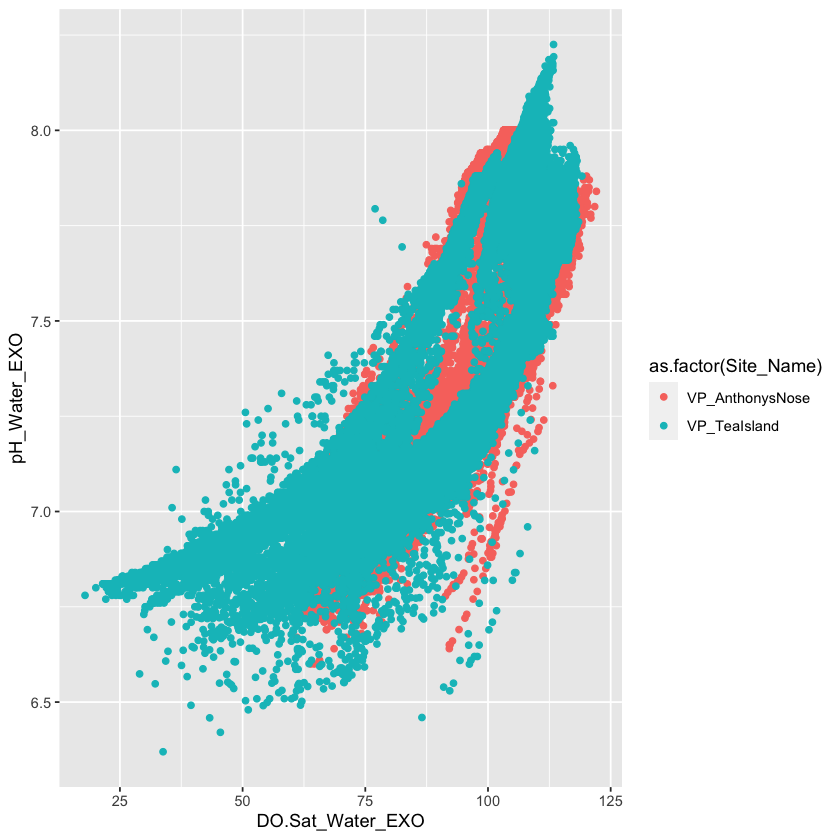

In [15]:
# DO.Sat_Water_EXO vs pH_Water_EXO
ggplot(df, mapping=aes(x=DO.Sat_Water_EXO, y=pH_Water_EXO, color=as.factor(Site_Name)))+
  geom_point()

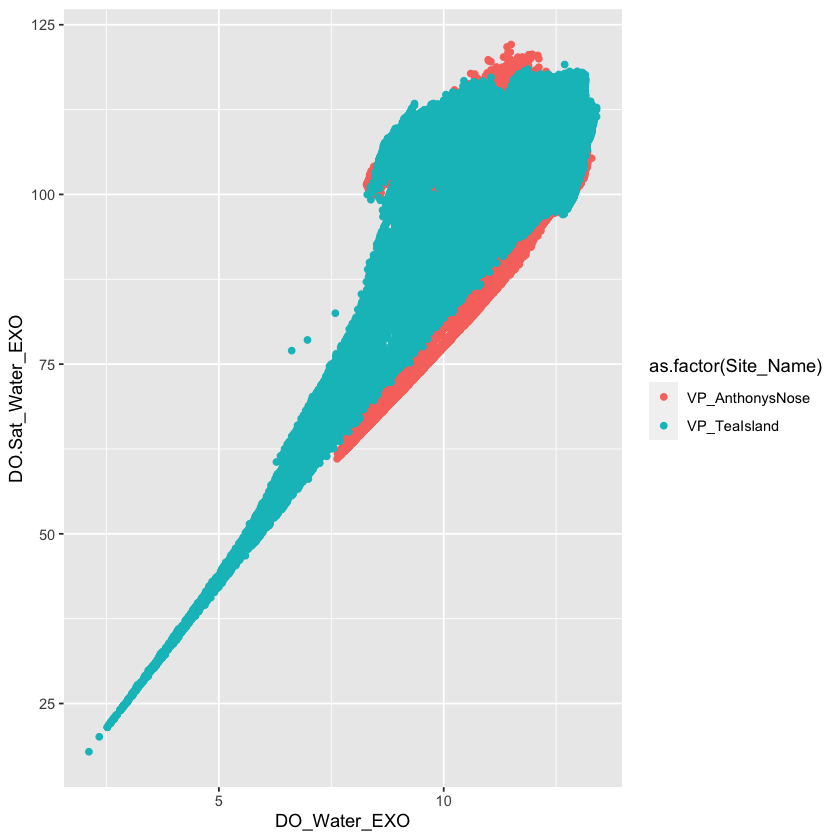

In [16]:
# DO_Water_EXO vs	DO.Sat_Water_EXO
ggplot(df, aes(DO_Water_EXO,	DO.Sat_Water_EXO, color=as.factor(Site_Name)))+
  geom_point()

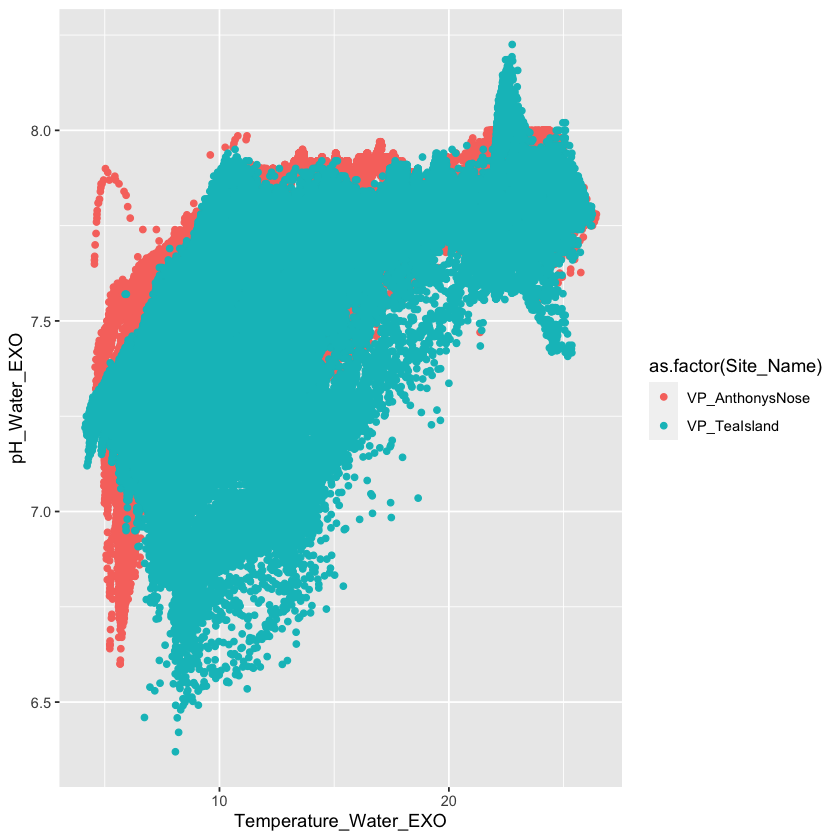

In [17]:
# Temperature_Water_EXO	vs pH_Water_EXO
ggplot(df, aes(Temperature_Water_EXO,	pH_Water_EXO, color=as.factor(Site_Name)))+
  geom_point()

## Turbidity

Turbidity is caused by particles suspended or dissolved in water that scatter light making the water appear cloudy or murky. Particulate matter can include sediment - especially clay and silt, fine **organic** and **inorganic** matter, soluble colored organic compounds, **algae**, and other microscopic organisms.

In [18]:
# install.packages('hrbrthemes')
library(hrbrthemes)

also installing the dependencies ‘triebeard’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘urltools’, ‘httpcode’, ‘shiny’, ‘crul’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘extrafontdb’, ‘Rttf2pt1’, ‘systemfonts’, ‘gfonts’, ‘fontquiver’, ‘extrafont’, ‘gdtools’





The downloaded binary packages are in
	/var/folders/gw/lpzg_5qx4xs1zxy36cq8fs0r0000gn/T//RtmpD4xhEs/downloaded_packages


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [19]:
ggplot(df, aes(x=DateTime, y = Turbidity_Water_EXO))+
  geom_line()+
  theme_ipsum() +
  theme(axis.text.x=element_text(angle=60, hjust=1)) 

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial Narrow' not found in PostScript font database”
Warning message in g

In [ ]:
str(df$DateTime)